# Lecture 2, Data science in Neuroscience

You can download this Notebook from https://github.com/kevin-allen/dataScienceNeuro


## Plan for today

1. Review NumPy arrays
2. Introduction to machine learning
3. Quizz on machine learning
4. Simple example of how computers learn from data (linear regression with data from a speed cell).

***

## Review NumPy arrays

In [1]:
import numpy as np

In [2]:
a = np.array([1,2,3,4])
a

array([1, 2, 3, 4])

In [3]:
ones = np.ones(4)
ones

array([1., 1., 1., 1.])

Use `type()` to make sure you are working with a NumPy array.

In [4]:
print("type:",type(a))

type: <class 'numpy.ndarray'>


Then use the 4 attributes (ndim,shape,size,dtype) to know the properties of the array.

In [5]:
print("ndim:",a.ndim)
print("shape:",a.shape)
print("size:",a.size)
print("dtype:",a.dtype)

ndim: 1
shape: (4,)
size: 4
dtype: int64


We can do math with array of the same shape.

In [6]:
a.shape,ones.shape

((4,), (4,))

In [7]:
a+ones

array([2., 3., 4., 5.])

2D arrays are like Excel sheets or images. 

In [8]:
b = np.array([[1,2]])
b

array([[1, 2]])

In [9]:
b.shape

(1, 2)

In [10]:
f = np.arange(24)
f

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [11]:
f.shape

(24,)

In [12]:
f = f.reshape(-1,2)
f

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23]])

In [13]:
b.shape,f.shape

((1, 2), (12, 2))

We can do mathematical operations with two arrays that do not have the same shape using **broadcasting**.

```
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when

* they are equal, or
* one of them is 1
```

In [14]:
f+b

array([[ 1,  3],
       [ 3,  5],
       [ 5,  7],
       [ 7,  9],
       [ 9, 11],
       [11, 13],
       [13, 15],
       [15, 17],
       [17, 19],
       [19, 21],
       [21, 23],
       [23, 25]])

## Introduction to machine learning

What is machine learning?


**Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed.**

**The computer learns from input data to achieve a specific objective.**

Examples: 

* A program learns to identify the nose, ears and tail of a mouse in images (very complex model). 
* A program learns the linear relationship between the firing rate of a neuron and the running speed of an animal (very simple model).


## Why should you care about machine learning as a Neuroscientist?


Machine learning is behind many modern tools used by neuroscients.

* [Track behavior with DeepLabCut](https://www.nature.com/articles/s41593-018-0209-y)
* [Image segmentation (e.g., cell counting) using a U-Net](https://www.nature.com/articles/s41592-018-0261-2)
* [Spike extraction and clustering with Kilosort](https://www.biorxiv.org/content/10.1101/061481v1)

These are state-of-the-art software in their respective field.

They make new experiments possible. They can discover patterns in your data. They can save you a lot of time (e.g., labeling images).

## Objectives for this week

* Understand what machine learning is
* Get faminiar with the terminology
* Experiment with a few examples
* Learn to go from a simple math formula to python code
* Perform a matrix multiplication using NumPy
* Go through the main loop that allows a computer to learn from data

***
## Definition of machine learning

* Input: $X$ (single number or an array)
* Output: $Y$ (single number or an array)
* Unknown function or model: $f()$
* Random error: $\epsilon$

$Y = f(X) + \epsilon $

Machine learning refers to a set of approaches for estimating the best parameters in $f()$

$f()$ can be the the equation for a line with 2 parameters or a deep neural network with millions of parameters (GPT-3 has ~175 billion parameters).

***
## What is learning?

Learning can be defined as finding the best model parameters to solve a problem.

**Simple example**: Find the relationship between the running speed of an animal ($x$) and the firing rate of a neuron ($y$) with a linear regression model. A linear regression has 2 parameters ($a$ and $b$).

$y = a*x + b $

**Complex example**: Find a mouse in an image using a deep neural network. We are dealing with millions of parameters.


<div>
<img src="../images/deep-neural-network.png" width="500"/>
</div>



***
# Terminology in machine learning


***
## Supervised versus unsupervised

### Supervised
* The training set contains **labeled data**.
* For each observation of the predictors $X_{i}, i = 1,...,n$ there is a known response measurement $y_{i}$.
* Example: linear regression

### Unsupervised
* Uncovering hidden patterns from unlabeled data.
* For each observation $i = 1,...,n$, we observed a vector of measurements $X_{i}$, but no response $y_{i}$.
* Examples: PCA and k-means clustering used in lecture 3.


***
## Regression versus classification

### Regression

* $Y$ is a continuous variable.
* We want to predict continuous values (firing rate, temperature, salaries, etc.)

### Classification

* $Y$ is a categorical variable.
* We want to classify cats and dogs in images or we want to classify neurons as excitatory and inhibitory based on their properties (e.g., firing rate).


***
## Training loop

Many models are trained using a training loop. In programing language, this is just a `for` loop.

At the beginning you initialize the model with random parameters.

Then, for each iteration:

1. Feed data with labels to your model
2. Calculate the error of your model (using a loss function).
3. Adjust the model parameters by a small amount to reduce the error.

You repeat these 3 steps until the model predicts the data. 


<div>
<img src="../images/my_training_loop.png" width="600"/>
</div>



***
## Training and test sets

### Training set

* The observations (data points) that we use to estimate $f$ (to train our model). 

### Test set

* Observations used to test how accurate our model is. The model has never "seen" this data because they are not used during training!

* The test set is very important when using complex models with many parameters. Complex models can learn to perform great on your training set but may generalize very poorly to new data. This is called **overfitting**. You can assess whether your model is overfitting using a test set.


***
## Time for a quizz!

[Quizz link](https://forms.gle/7UqS3TK2ZAeM7wk77)

https://forms.gle/7UqS3TK2ZAeM7wk77

You have 7 minutes to complete the questions.


*** 
## Linear algebra and machine learning

In machine learning, data are stored in vectors and matrices. 

Models usually take vectors, matrices, or N-dimension arrays as inputs.

In **NumPy**, vectors are like 1-dimensional arrays, and matrices are like 2-dimensional arrays.  

### Matrix multiplication

Machine learning often involves matrix multiplication. Here is what we need to know for today.

* In NumPY, the `@` operator is used to compute the matrix product between 2d arrays. Alternatively, use `numpy.matmul()`.

* For matrix multiplication, the number of columns in the first matrix must equal the number of rows in the second matrix. 


Here is how a matrix multiplication works.

$ 
a = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}
$

$ 
b = \begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
$

$
a@b =
\begin{bmatrix}
1*1 + 2*2 + 3*3 \\
4*1 + 5*2 + 6*3  
\end{bmatrix} =
\begin{bmatrix}
14 \\
32  
\end{bmatrix}
$

In [15]:
a = np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
a.shape

(2, 3)

In [17]:
b = np.array([[1],[2],[3]])
b

array([[1],
       [2],
       [3]])

In [18]:
b.shape

(3, 1)

In [19]:
c = a@b
c

array([[14],
       [32]])

In [20]:
c.shape

(2, 1)

a@b is not the same as b@a.

This is enough linear algebra for today.

***
# Using machine learning to characterize a speed cell.

**Speed cell**: Neuron that increases its firing rate when the animal runs at higher speed. These neurons have been observed in several brain areas, including the medial entorhinal cortex, hippocampus, and visual cortex.

[Speed cells in the medial entorhinal cortex (2015) Nature](https://www.nature.com/articles/nature14622)


<div>
<img src="../images/speed_kropff.png" width="800"/>
</div>


## Our task

Write and **train a linear model** that will describe how the firing rate of a neuron is related to the running speed of a mouse.

Because we want to understand how machine learning works under the hood, we will do all the steps without using external libraries like scipy, scikit-learn or pytorch.



## A simulated speed cell

To know if our modeling approach is working, it is useful to start with simulated data. The main advantage is that we know the exact parameters that were used when generating the data. If your approach works, it should find the same parameters.

* When coding, it is usually a good idea to start with simulated data. Some problems will be easier to fix. You can easily manipulated/change simulated data and assess the effect on your model.
* Try to make your simulated data as similar to the real data with which you plan to use the model.


#### Running speed data from a running mouse

We can load speed data from a real experiment with a mouse running in a maze. The file contains the running speed of the mouse as a function of time. The sampling rate was 50 Hz.

The duration of the recording is 546 seconds.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
fn = "../data/animal_speed.npy"

In [23]:
speed = np.load(fn)
# get some information about the data just loaded
print(type(speed), speed.ndim, speed.shape)

<class 'numpy.ndarray'> 1 (27304,)


Always inspect your data with a few plots

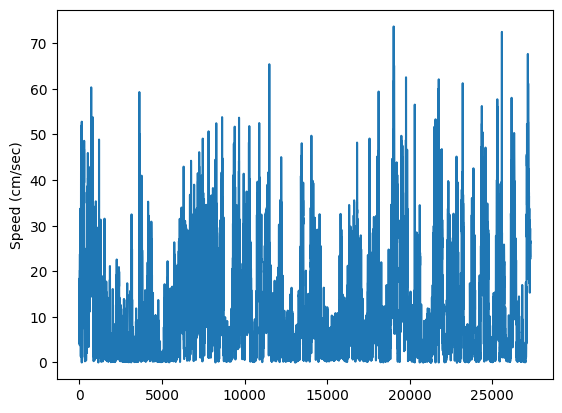

In [24]:
plt.plot(speed)
plt.ylabel("Speed (cm/sec)")
plt.show()

The animal is running between 0 and 40 cm/sec most of the time. This seems reasonable. 

## Simulation of the firing rate of a neuron 

We will simulate the firing rate of our neuron and create a linear relationship between running speed and firing rate. 

Our formula for simulating the firing rate is

$rate = speed*w + b + error$

The advantage of working with simulated data at this point is that we will know the "real" relationship and can test whether our model is able to find it.


In [25]:
w = 1.25 # parameter 2
b = 10 # parameter 1
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

## Exercise

* Generate your simulated firing rates using the formula $rate = speed * w + b + error$.
* Plot the results
* Are firing rates below zero realistic? What can we do about it?


We can use `np.maximum()` to get rid of negative firing rates.

In [41]:
rate = np.maximum(0, rate)

## Our modelling task:

Write an algorithm from scratch that will find the best parameters $w$ and $b$ to predict the firing rate of the neuron given the animal running speed.

We used a linear regression model $Y = f(X)$, where $X$ is the running speed and $Y$ is the firing rate. Because we generated the data, we know this is a good choice. In reality, you would plot the real data and decide whether a linear model is appropriate.

For a linear regression, the model is $Y = Xw + b$

In machine learning lingo, $w$ is the weight, and $b$ is the bias.

To solve our problem, we ask what parameters $w$ and $b$ best predict the firing rate of the neuron.

Because we are working with simulated data, we already know the best parameters, but we want to see if our machine-learning algorithm can estimate them from the data. If we get $w = 1.25$ and $b = 10.0$, we know our method is working. 

## Possible ways to solve this problem

Our problem is a **linear regression** because the output is simply a weighted sum of the inputs plus a constant called the bias term (or intercept).

There are many ways to find the best parameters:

1. Training loop using Gradient Descent.
2. `scipy.stats.linregress`
3. `sklearn.linear_model.LinearRegression`


Because our goal is to understand machine learning, we will write our own training loop (Option 1)


## Our linear regression model


In our simple case, this is the model:

$\hat{y} = \theta_0 + \theta_1 * x_1$

* $\hat{y}$ is the prediction of the model.
* $\theta$ is a vector containing our parameters ($b=\theta_0$ and $w=\theta_1$). 
* $x$ is a vector containing our input (running speed).

## Using matrix multiplication to calculate $\hat{y}$

We want to be able to calculate this formula for several data points in one go. We can do this using matrix multiplications.

$\theta$ will be represented as a row vector: $\begin{bmatrix} \theta_0 & \theta_1  \end{bmatrix}$ or $\begin{bmatrix} b & w \end{bmatrix}$

$x$ will be represented as a column vector. We need add a 1 as $x_0$ and the speed as $x_1$: $\begin{bmatrix} x_0 \\ x_1  \end{bmatrix}$ or $\begin{bmatrix} 1 \\ speed  \end{bmatrix}$


We can now use matrix multiplication to get our model predictions.

$ \hat{y} =  \begin{bmatrix} \theta_0 && \theta_1 \end{bmatrix} * \begin{bmatrix} x_0 \\ x_1 \end{bmatrix} = \theta_0 * x_0 + \theta_1 * x_1$

or

$ \hat{y} = \begin{bmatrix} b & w \end{bmatrix} * \begin{bmatrix} 1 \\ speed \end{bmatrix} =  b * 1 + w * speed$

If first matrix is 1x2 and the second 2x1, this gives a 1x1 output.



Let's try this out.

In [26]:
theta = np.array([[20.0,2.0]]) # 1by2 matrix, random guess of the 2 model parameters (b and w)
print("theta.shape:",theta.shape)
print("theta:")
print(theta)
print()

x = np.array([[1.0],[10.0]]) # 2x1 matrix, 1 data point, 1 and speed
print("x.shape:",x.shape)
print("x:")
print(x)
print()

# dot product of 2 vectors, for cleaner code
y = theta@x # matrix multiplication with numpy, you can also use np.matmul
print("y.shape:",y.shape)
print("y:")
print(y)


theta.shape: (1, 2)
theta:
[[20.  2.]]

x.shape: (2, 1)
x:
[[ 1.]
 [10.]]

y.shape: (1, 1)
y:
[[40.]]


### Why using matrix multiplications makes sense?

The beauty of working with matrix multiplications is that we can work with several data points at the same time.


$ \begin{bmatrix} b & w \end{bmatrix} * \begin{bmatrix} 1 & 1 & 1 & 1 \\ speed_0 & speed_1 & speed_2 & speed_3 \end{bmatrix} = \begin{bmatrix} y_0 & y_1 & y_2 & y_3 \end{bmatrix}$


Each element of y results from $b*1+w*speed$, which is our linear model.

In [28]:
# example in which we would have 3 speed input

theta = np.array([[0.0,3.0]]) # random guess of the 2 model parameters, same as above
print("theta shape:",theta.shape)
print("theta:")
print(theta)
print()

x = np.array([[1,1,1], # x_0
             [10.0,15,20]]) # x_1
print("x shape:",x.shape)
print("x:")
print(x)
print()

y = theta@x # make prediction
print("y.shape:",y.shape)
print("y:")
print(y)

theta shape: (1, 2)
theta:
[[0. 3.]]

x shape: (2, 3)
x:
[[ 1.  1.  1.]
 [10. 15. 20.]]

y.shape: (1, 3)
y:
[[30. 45. 60.]]


In summary, we can use `theta@x` to predict the firing rate of the neuron.

When we train our model, we will modify the values in $\theta$ in order to improve our predictions.

We can now put our 27304 data points in the 2D array $x$. The first row is always 1s.

In [29]:
speed.shape[0]

27304

In [30]:
X = np.ones((2,speed.shape[0]))  # make a 2 rows array with ones in the first row and speed in the second row


In [31]:
X[1,:]

array([1., 1., 1., ..., 1., 1., 1.])

In [32]:
speed

array([16.56109922, 18.39592726, 14.97058294, ..., 26.68191607,
       26.41183643, 26.29908668])

In [33]:
X[1,:] = speed
print(X)
print("X.shape:",X.shape)

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [16.56109922 18.39592726 14.97058294 ... 26.68191607 26.41183643
  26.29908668]]
X.shape: (2, 27304)


In [34]:
theta

array([[0., 3.]])

In [35]:
theta.shape

(1, 2)

In [36]:
yhat = theta@X # prediction of the model
yhat.shape

(1, 27304)

In [38]:
yhat

array([[49.68329766, 55.18778178, 44.91174883, ..., 80.04574821,
        79.2355093 , 78.89726005]])

This is how the first number was obtained.

In [40]:
0.0*1 + 3*16.56109922

49.683297659999994

We just predicted the firing rate from our models for 27304 data points.

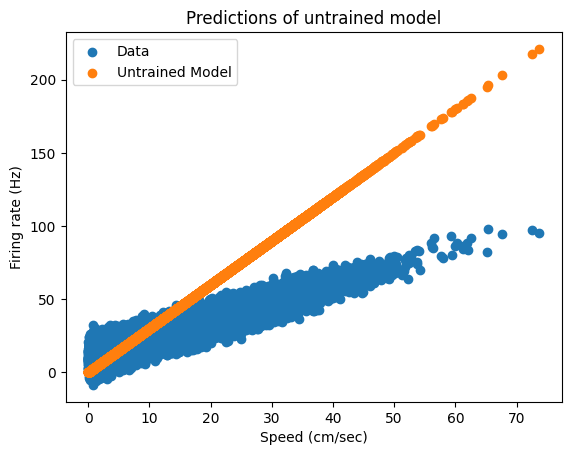

In [43]:
plt.scatter(speed,rate,label="Data")
plt.scatter(speed,yhat,label="Untrained Model")
plt.title("Predictions of untrained model")
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()
plt.show()

In [44]:
untrained_yhat=yhat

Our untrained models is a pretty bad predictor of the firing rate of the neuron.

Let's try to improve this.